# Proyecto: Toma de decisiones de negocios basadas en datos


## Descripción del proyecto

En este proyecto, analisamos los datos de una tienda en línea. El principal objetivo es ayudar a incrementar los ingresos de la empresa mediante la priorización de hipótesis propuestas en colaboración con el departamento de marketing y la ejecución de un experimento A/B. Para lograr esto, abordaremos dos partes fundamentales: la priorización de hipótesis utilizando los frameworks ICE y RICE, y el análisis detallado de los resultados del test A/B.

### Contexto

El proyecto inicia con una serie de hipótesis, cada una diseñada para mejorar el desempeño de la tienda en línea. A través de técnicas de priorización de hipótesis, seleccionaremos las más prometedoras para ponerlas a prueba en un experimento A/B. Este análisis busca determinar si las estrategias implementadas generan un impacto significativo en los ingresos, en el comportamiento de los usuarios y en las tasas de conversión.

### Descripción de los datos

Para llevar a cabo este proyecto, se utilizan dos conjuntos de datos principales:

#### Datos para la priorización de hipótesis
Archivo: `hypotheses_us.csv`

Las columnas incluyen:

- **Hypotheses**: descripción breve de cada hipótesis.
- **Reach**: el alcance de la hipótesis en una escala del 1 al 10.
- **Impact**: el impacto potencial de la hipótesis en los usuarios en una escala del 1 al 10.
- **Confidence**: el nivel de confianza en la hipótesis en una escala del 1 al 10.
- **Effort**: los recursos necesarios para implementar la hipótesis, medidos en una escala del 1 al 10.

#### Datos del experimento A/B
Archivos:`orders_us.csv`, `visits_us.csv`

**orders_us.csv**: contiene información sobre los pedidos realizados, como el identificador del pedido, el usuario, la fecha, los ingresos generados y el grupo de test A/B al que pertenece el usuario.

Las columnas incluyen:

- **transactionId**: identificador de pedido
- **visitorId**: identificador del usuario que realizó el pedido
- **date**: fecha del pedido
- **revenue**: ingresos del pedido
- **group**: el grupo del test A/B al que pertenece el usuario

**visits_us.csv**: incluye información diaria sobre el número de visitas de los usuarios, la fecha y el grupo de test A/B.

Las columnas incluyen:

- **date**: la fecha
- **group**: grupo del test A/B
- **visits**: el número de visitas en la fecha especificada para el grupo de test A/B especificado

### Priorizar hipótesis

Utilizaremos dos frameworks populares para priorizar las hipótesis: **ICE** y **RICE**. El objetivo es evaluar las hipótesis en términos de impacto, confianza, esfuerzo y alcance, y compararlas entre ambos métodos para identificar las más valiosas para el negocio.

### Análisis del test A/B

El siguiente paso del proyecto es analizar los resultados del experimento A/B, que nos permitirá validar las hipótesis seleccionadas. Para ello, estudiaremos diversas métricas, como el ingreso acumulado, el tamaño promedio de los pedidos, la tasa de conversión y la significancia estadística de las diferencias entre los grupos A y B.

Entre los análisis clave se incluyen:

- **Ingreso acumulado por grupo**: para ver cómo varían los ingresos en cada grupo a lo largo del tiempo.
- **Tamaño de pedido promedio**: para determinar si existe una diferencia en el valor promedio de los pedidos entre los grupos.
- **Tasa de conversión**: para analizar cuántos usuarios completan un pedido en cada grupo.
- **Distribución de pedidos por usuario**: observando la dispersión de los pedidos y el comportamiento de usuarios anómalos.
- **Significancia estadística**: verificaremos si las diferencias observadas entre los grupos A y B son estadísticamente significativas en términos de conversión y tamaño de pedido.

### Toma de decisiones basada en los resultados

Finalmente, con base en los resultados del análisis, se tomará una decisión informada sobre si implementar las estrategias del grupo B o realizar ajustes adicionales para optimizar los ingresos de la tienda en línea.

Este enfoque basado en datos permitirá garantizar que las decisiones de negocio estén respaldadas por pruebas y resultados cuantitativos sólidos, maximizando así las oportunidades de éxito.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, me encanta la forma en que introduces el proyecto, todo está muy ordenado y con una estructura que invita al lector a seguir explorando tu contenido. Te felicito. 
</div>

## Importar librerias

In [29]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
import numpy as np
import scipy.stats as stats

## Importar datasets

In [30]:
# Cargar los archivos CSV
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
orders = pd.read_csv('orders_us.csv', dtype={'transactionId': 'int64', 'visitorId': 'int64', 'revenue': 'float64', 'group': 'category'}, parse_dates=['date'], memory_map=True)
visits = pd.read_csv('visits_us.csv', dtype={'group': 'category', 'visits': 'int64'}, parse_dates=['date'])

In [31]:
# Llama al método info()
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [32]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [33]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


¨**Identificar y eliminar los visitantes duplicados que pertenecen a múltiples grupos**

In [34]:
# Identificar visitantes que pertenecen a múltiples grupos
visitor_groups = orders.groupby('visitorId')['group'].nunique().reset_index()

# Filtrar visitantes que están en ambos grupos
duplicate_visitors = visitor_groups[visitor_groups['group'] > 1]['visitorId']

# Eliminar del DataFrame original aquellos visitantes duplicados
orders = orders[~orders['visitorId'].isin(duplicate_visitors)]

# Resumir la información de visitantes únicos por grupo
unique_visitors_summary = orders.groupby('group')['visitorId'].nunique().reset_index()

# Imprimir resultados
print(f"Total de visitantes únicos por grupo:\n{unique_visitors_summary}")
print(f"\nTotal de transacciones después de la limpieza: {orders.shape[0]}")


Total de visitantes únicos por grupo:
  group  visitorId
0     A        445
1     B        528

Total de transacciones después de la limpieza: 1016


C:\Users\Main\AppData\Local\Temp\ipykernel_13880\3396029086.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_visitors_summary = orders.groupby('group')['visitorId'].nunique().reset_index()


In [35]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [36]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [37]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


## Priorizar hipótesis

En el contexto del comercio electrónico, la identificación de estrategias efectivas para aumentar los ingresos es fundamental. El archivo `hypotheses_us.csv` presenta nueve hipótesis que proponen diferentes iniciativas, cada una evaluada en términos de **Reach** (alcance), **Impact** (impacto), **Confidence** (confianza) y **Effort** (esfuerzo). Este análisis se realiza mediante los frameworks de priorización **ICE** (Impact, Confidence, Effort) y **RICE** (Reach, Impact, Confidence, Effort), que permiten clasificar las hipótesis en función de su potencial para generar ingresos.


In [38]:
# Calcula el puntaje ICE para cada hipótesis.
# ICE = (Impacto * Confianza) / Esfuerzo
hypotheses['ICE_Score'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Calcula el puntaje RICE para cada hipótesis.
# RICE = (Alcance * Impacto * Confianza) / Esfuerzo
hypotheses['RICE_Score'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

### Framework ICE

C:\Users\Main\AppData\Local\Temp\ipykernel_13880\1366058176.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ICE_Score', y='Short_Hypothesis', data=hypotheses, palette='crest')


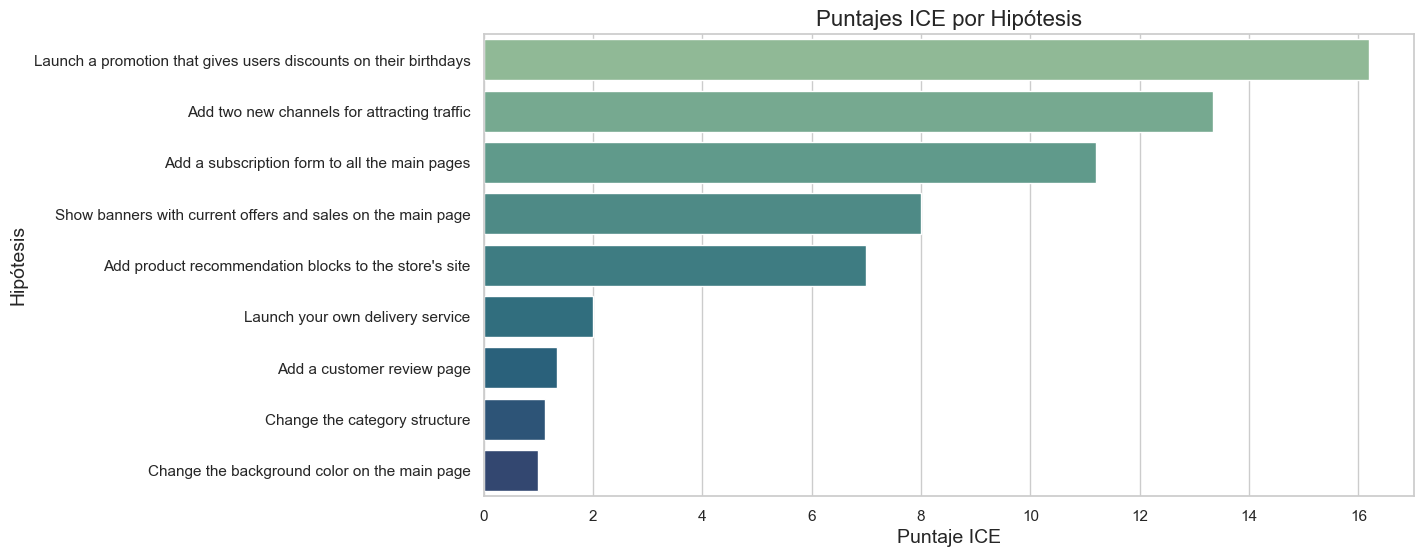

In [39]:
# Ordenar el DataFrame por la columna ICE_Score en orden descendente
hypotheses = hypotheses.sort_values(by='ICE_Score', ascending=False)

# Usar expresiones regulares para extraer solo el texto antes del primer punto
hypotheses['Short_Hypothesis'] = hypotheses['Hypothesis'].apply(lambda x: re.split(r'\.', x)[0])

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura según sea necesario
sns.barplot(x='ICE_Score', y='Short_Hypothesis', data=hypotheses, palette='crest')

# Configurar títulos y etiquetas
plt.title('Puntajes ICE por Hipótesis', fontsize=16)
plt.xlabel('Puntaje ICE', fontsize=14)
plt.ylabel('Hipótesis', fontsize=14)

# Mostrar el gráfico
plt.show()

**Puntos clave priorizados por el ICE Score**

1. **Prioridad clara basada en impacto y confianza**:
La hipótesis con el mayor ICE Score es **"Launch a promotion that gives users discounts"** con un ICE Score de 16.2. Esta idea tiene un alto impacto (9) y confianza (9), aunque su alcance es bajo (1). Esto sugiere que, aunque esta iniciativa puede no llegar a todos los usuarios, tiene un impacto significativo en aquellos a los que afecta, lo que la convierte en una de las ideas más atractivas para implementar.

**"Add two new channels for attracting traffic"** también tiene un ICE Score elevado de 13.33, lo que implica que podría generar un gran beneficio (impacto 10 y confianza 8), aunque requiere un esfuerzo considerable (6). Esto puede ser una estrategia de largo plazo que genere mucho valor.

2. **Ideas de bajo esfuerzo y alto beneficio**:
**"Add a subscription form to all the main pages"** tiene un ICE Score elevado de 11.2. Esta hipótesis combina un alcance (10) y confianza (8) altos con un esfuerzo relativamente moderado (5), lo que la convierte en una opción muy atractiva para implementación rápida. Podría llegar a una amplia base de usuarios con un buen potencial de impacto.

**"Show banners with current offers and sales on the main page"** y **"Add product recommendation blocks to the store website"** también destacan con buenos ICE Scores (8.0 y 7.0, respectivamente). Estas ideas tienen un esfuerzo bajo (3), lo que sugiere que son implementaciones rápidas y efectivas con un beneficio considerable.

3. **Ideas con bajo impacto o bajo retorno**:
Las hipótesis como **"Change the background color on the main page"** y **"Change the category structure"** tienen ICE Scores bajos (1.0 y 1.12, respectivamente). A pesar de que son fáciles de implementar (esfuerzo bajo), su bajo impacto y confianza sugieren que no tendrán un efecto significativo en los resultados. Estas podrían ser descartadas o relegadas a un nivel de prioridad menor.

**"Add a customer review page"** tiene un ICE Score de 1.33, lo que indica que, aunque puede ser útil, es probable que no tenga un impacto sustancial, y el esfuerzo puede no justificar su implementación inmediata.

4. **Alto esfuerzo, bajo retorno**:
La idea de **"Launch your own delivery service"** tiene un ICE Score de 2.0, debido a que el esfuerzo necesario es alto (10), pero su impacto y confianza no lo justifican completamente. Esta iniciativa sería costosa y difícil de implementar con un retorno relativamente bajo, por lo que probablemente no sea una buena inversión de recursos en este momento.

**Conclusiones:**
Las ideas más prioritarias parecen ser aquellas que tienen un impacto significativo y un esfuerzo moderado, como **"Launch a promotion that gives users discounts"**, **"Add two new channels for attracting traffic"**, y **"Add a subscription form to all the main pages"**.

Las iniciativas de bajo esfuerzo y alto impacto, como **"Show banners with current offers and sales on the main page"** o **"Add product recommendation blocks to the store website"**, son soluciones rápidas y efectivas que podrían traer beneficios significativos con poco costo.

Las ideas de bajo impacto o alto esfuerzo, como **"Change the background color on the main page"** o **"Launch your own delivery service"**, probablemente no sean rentables y deberían ser consideradas para futuro, si acaso.


### Framework RICE

C:\Users\Main\AppData\Local\Temp\ipykernel_13880\349494330.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RICE_Score', y='Short_Hypothesis', data=hypotheses, palette='autumn')


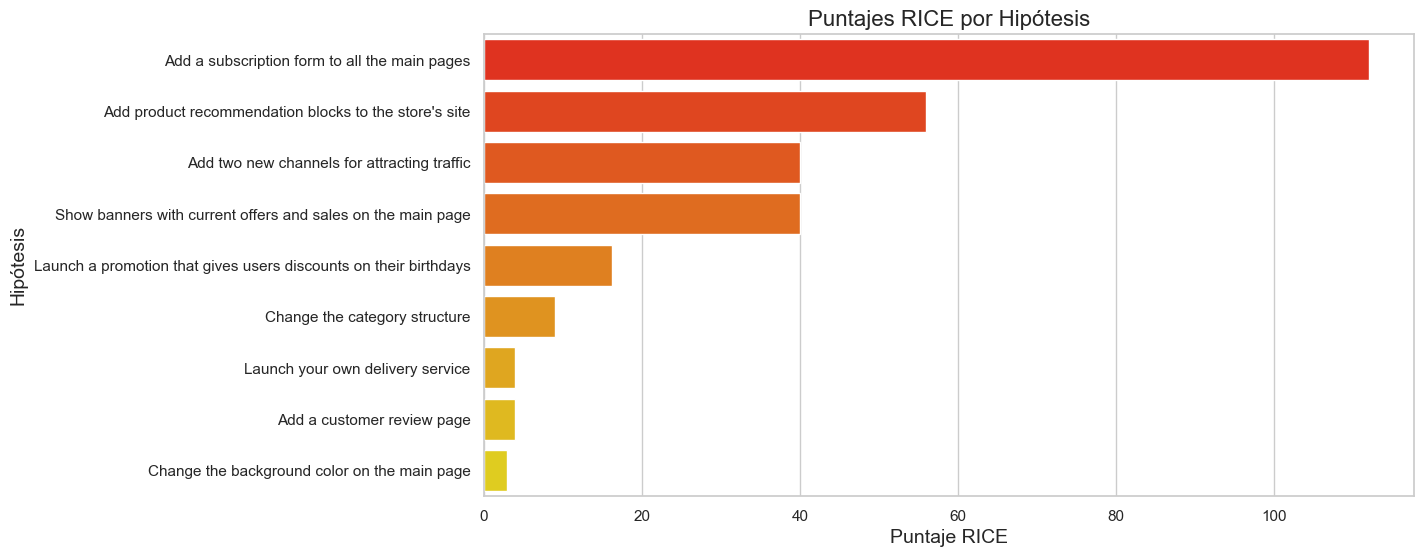

In [40]:
# Ordenar el DataFrame por la columna ICE_Score en orden descendente
hypotheses = hypotheses.sort_values(by='RICE_Score', ascending=False)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Ordenar el DataFrame por RICE_Score de manera descendente
hypotheses = hypotheses.sort_values('RICE_Score', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura según sea necesario
sns.barplot(x='RICE_Score', y='Short_Hypothesis', data=hypotheses, palette='autumn')

# Configurar títulos y etiquetas
plt.title('Puntajes RICE por Hipótesis', fontsize=16)
plt.xlabel('Puntaje RICE', fontsize=14)
plt.ylabel('Hipótesis', fontsize=14)

# Mostrar el gráfico
plt.show()

**Puntos clave basados en el RICE Score**

1. **Mayor prioridad con alto alcance:**  
La hipótesis **"Add a subscription form to all the main pages"** tiene el RICE Score más alto, con un 112.0. Esto se debe principalmente a su alto alcance (Reach de 10), lo que implica que podría llegar a la mayor cantidad de usuarios. Además, su impacto (7) y confianza (8) son bastante buenos, y el esfuerzo (5) es relativamente moderado. Esta es, sin duda, una de las iniciativas más prioritarias dado su amplio impacto potencial.

2. **Estrategias con buen balance entre alcance y esfuerzo:**  
Las hipótesis **"Add two new channels for attracting traffic"** y **"Show banners with current offers and sales"** comparten un RICE Score de 40.0. Estas ideas tienen un buen equilibrio entre alcance, impacto y confianza, aunque el esfuerzo es un poco más alto (6 y 3, respectivamente). Son opciones interesantes para implementar, ya que pueden generar beneficios considerables sin un esfuerzo desmedido.

3. **Impacto considerable con esfuerzo moderado:**  
La hipótesis **"Add product recommendation blocks to the store"** tiene un RICE Score de 56.0. Aunque su alcance es menor que la opción anterior (Reach de 8), sigue siendo una de las iniciativas más prometedoras con un esfuerzo relativamente bajo (3). Esta idea podría generar una mejora significativa en la experiencia del usuario con un esfuerzo razonable.

4. **Menor prioridad debido a bajo alcance o alto esfuerzo:**  **"Launch a promotion that gives users discounts"** tiene un RICE Score de 16.2, que es considerablemente más bajo debido a su bajo alcance (Reach de 1). Aunque el impacto y la confianza son altos, el hecho de que esta iniciativa llegue a tan pocos usuarios limita su prioridad a pesar de ser beneficiosa para los que sí afecte.  **"Launch your own delivery service"** tiene un RICE Score bajo de 4.0, debido a un alto esfuerzo (10) en comparación con su impacto y confianza. Este tipo de idea sería costosa de implementar sin un retorno claro, por lo que probablemente no sea una de las mejores inversiones de recursos.

5. **Iniciativas con muy bajo retorno:**  
Las ideas como **"Change the background color on the main page"** tienen un RICE Score de 3.0, lo que sugiere que, a pesar de su bajo esfuerzo (1), el impacto es extremadamente bajo. Este tipo de iniciativa es la menos prioritaria, ya que no generaría un cambio significativo en los resultados generales.


### Comparación de la Priorización de Hipótesis: RICE vs. ICE

**1. Diferencias Fundamentales en el Enfoque:**
- **RICE** (**Reach, Impact, Confidence, Effort**) se centra más en la **capacidad de llegar a los usuarios** y en el **impacto potencial** de la implementación en comparación con el **esfuerzo requerido**. Este método prioriza las iniciativas que tienen un **amplio alcance** y un **impacto significativo**, lo que permite identificar las oportunidades con mayor potencial para generar **beneficios amplios**.

- **ICE** (**Impact, Confidence, Effort**) se centra en **impacto** y **confianza** de las hipótesis sin considerar el **alcance de la solución**. Esto puede resultar en priorizar iniciativas que, aunque son efectivas, podrían no tener el mismo nivel de **exposición a los usuarios**.

**2. Cambios en la Prioridad:**
- **Iniciativas de Alto Alcance:** Con el **RICE Score**, la hipótesis **"Add a subscription form to all the main pages"** recibe una **alta priorización** (**RICE Score de 112.0**) gracias a su **alto alcance** (**10**), lo que indica que puede **impactar a un gran número de usuarios**. En cambio, en el **ICE Score**, esta hipótesis se mantiene en la parte alta, pero el enfoque es **menos claro** en términos de **alcance**, ya que se evalúa sin considerar cuántos usuarios puede alcanzar realmente.

- **Impacto Significativo pero de Bajo Alcance:** La hipótesis **"Launch a promotion that gives users discounts"** muestra un **ICE Score alto** (**16.2**) por su **impacto** y **confianza**, pero su **bajo alcance** (**RICE Score de 16.2**) limita su priorización en el contexto del **RICE**. Esto resalta cómo **RICE** puede priorizar otras hipótesis que puedan **impactar a más usuarios**, aunque el **impacto individual** sea menor.

- **Estrategias Balanceadas:** Las hipótesis **"Add two new channels for attracting traffic"** y **"Show banners with current offers and sales"** obtienen un **RICE Score de 40.0**, lo que las coloca en un nivel prioritario **similar** al de **"Add product recommendation blocks to the store"** (**RICE Score de 56.0**). En el contexto de **ICE**, podrían no haber sido evaluadas tan favorablemente. **RICE** resalta la **importancia del alcance** y el **impacto conjunto**, lo que permite una evaluación más **balanceada**.

- **Iniciativas de Bajo Impacto:** Ideas como **"Change the background color on the main page"** y **"Change the category structure"** que tienen puntuaciones **bajas** en ambos sistemas (**1.0** y **1.12**) se mantienen en la parte **baja** de la priorización. Sin embargo, el **RICE Score** muestra que, aunque el **esfuerzo** es **bajo**, el **impacto** es tan **mínimo** que no justifica su **implementación**, sugiriendo que estos esfuerzos podrían ser **mejor invertidos** en ideas con **mayor potencial de alcance**.


## Análisis del test A/B

**Introducción**  
En este análisis, estamos evaluando los resultados de una prueba A/B. Una prueba A/B es una metodología común en el análisis de datos, utilizada para comparar dos grupos (en este caso, **Grupo A** y **Grupo B**) con el fin de identificar diferencias clave en su comportamiento. Nuestro objetivo es examinar el impacto de diferentes variables en el rendimiento de cada grupo, lo que nos ayudará a tomar decisiones informadas.

**Las métricas que estamos evaluando incluyen:**

- **Ingreso acumulado por grupo:** Veremos cómo evoluciona el ingreso total para cada grupo a lo largo del tiempo.
- **Tamaño promedio de pedido acumulado:** Compararemos la evolución del tamaño promedio de los pedidos en ambos grupos.
- **Tasa de conversión diaria:** Analizaremos cuántas visitas terminan en un pedido en cada grupo y cómo cambia esto día a día.
- **Número de pedidos por usuario:** Exploraremos cómo se distribuyen los pedidos entre los usuarios.
- **Precios de los pedidos:** Investigaremos los precios de los pedidos para detectar patrones o anomalías.

Además, evaluaremos la **significancia estadística** de las diferencias encontradas entre los grupos, tanto en términos de tasa de conversión como del tamaño promedio de pedido. Este análisis nos permitirá concluir si uno de los grupos muestra un rendimiento superior, si no hay diferencias significativas, o si es necesario continuar la prueba.


### Ingreso acumulado por grupo.

In [41]:
# Define el orden de las categorías si es necesario
group_type = CategoricalDtype(categories=['A', 'B'], ordered=True)

# Convierte la columna 'group' en una categórica ordenada
orders['group'] = orders['group'].astype(group_type)
visits['group'] = visits['group'].astype(group_type)

# Crear un DataFrame con las combinaciones únicas de 'date' y 'group'
datesGroups = orders[['date', 'group']].drop_duplicates()

# Agrupación acumulativa de los datos de 'orders'
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({
        'date': 'max',                # Fecha máxima
        'group': 'max',               # Grupo A/B
        'transactionId': pd.Series.nunique,  # Número de pedidos únicos (transactionId)
        'visitorId': pd.Series.nunique,      # Número de usuarios únicos (visitorId)
        'revenue': 'sum'              # Suma de los ingresos
    }), axis=1).sort_values(by=['date', 'group'])

# Agrupación acumulativa de los datos de 'visits'
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])
    ].agg({
        'date': 'max',        # Fecha máxima
        'group': 'max',       # Grupo A/B
        'visits': 'sum'       # Suma de las visitas
    }), axis=1).sort_values(by=['date', 'group'])

# Unir los datos acumulados de orders y visits
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Renombrar columnas para que sean más descriptivas
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


**Filtrar los datos**

In [42]:
# Filtrar los datos acumulados para el grupo A, seleccionando las columnas 'date', 'revenue', y 'orders'
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Filtrar los datos acumulados para el grupo B, seleccionando las columnas 'date', 'revenue', y 'orders'
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

**Crear un gráfico**

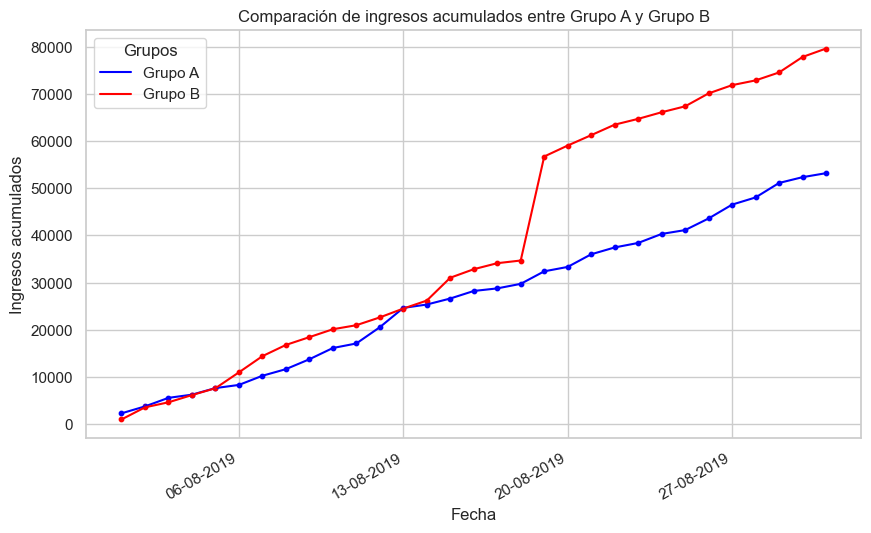

In [43]:
# Crear un gráfico
plt.figure(figsize=(10, 6))

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Grupo A', color='blue')
plt.scatter(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], color='blue', s=10)  # Agregar puntos para el grupo A

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Grupo B', color='red')
plt.scatter(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], color='red', s=10)  # Agregar puntos para el grupo B

# Mejorar las leyendas
plt.title('Comparación de ingresos acumulados entre Grupo A y Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')

# Formatear el eje de fechas para que sea más claro
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gcf().autofmt_xdate()

# Agregar una cuadrícula
plt.grid(True)

# Mostrar leyenda con título
plt.legend(title="Grupos")

# Mostrar gráfico
plt.show()


- **Diferencia significativa en ingresos acumulados:** El **Grupo B** generó notablemente más ingresos que el **Grupo A** al final del período analizado. Al **31 de agosto de 2019**, el **Grupo B** acumuló aproximadamente **79,651.2** en ingresos, mientras que el **Grupo A** acumuló **53,212.0**. Esto muestra una diferencia de más de **26,000 unidades monetarias** a favor del **Grupo B**.

- **Ritmo de crecimiento en ingresos:** El **Grupo B** experimentó un crecimiento más acelerado en ingresos a partir del **19 de agosto de 2019**, cuando los ingresos acumulados se dispararon de **34,684.7** el **18 de agosto** a **56,749.6** el día siguiente. Este fuerte crecimiento no se observó de manera tan pronunciada en el **Grupo A**, que creció de **29,735.7** a **32,389.3** en el mismo período.

- **Tendencia general:** A lo largo del experimento, el **Grupo B** ha mantenido consistentemente un mayor nivel de ingresos en comparación con el **Grupo A**. Esto sugiere que las modificaciones o estrategias aplicadas al **Grupo B** fueron más efectivas en generar ingresos que las aplicadas al **Grupo A**.

- **Pedidos acumulados:** El número de pedidos también fue mayor en el **Grupo B**, alcanzando **548 pedidos** el **31 de agosto**, frente a los **468 pedidos** del **Grupo A**. Aunque la diferencia en pedidos no es tan amplia como la de los ingresos, indica que el **Grupo B** no solo atrajo más ingresos por pedido, sino también un volumen ligeramente mayor de transacciones.

**Conclusiones:**
- El **Grupo B** parece estar funcionando mejor tanto en términos de ingresos como de número de pedidos.
- El mayor salto en ingresos para el **Grupo B** a partir del **19 de agosto** merece una investigación más profunda para identificar qué cambio específico podría haber desencadenado este aumento.


### Tamaño de pedido promedio acumulado por grupo.

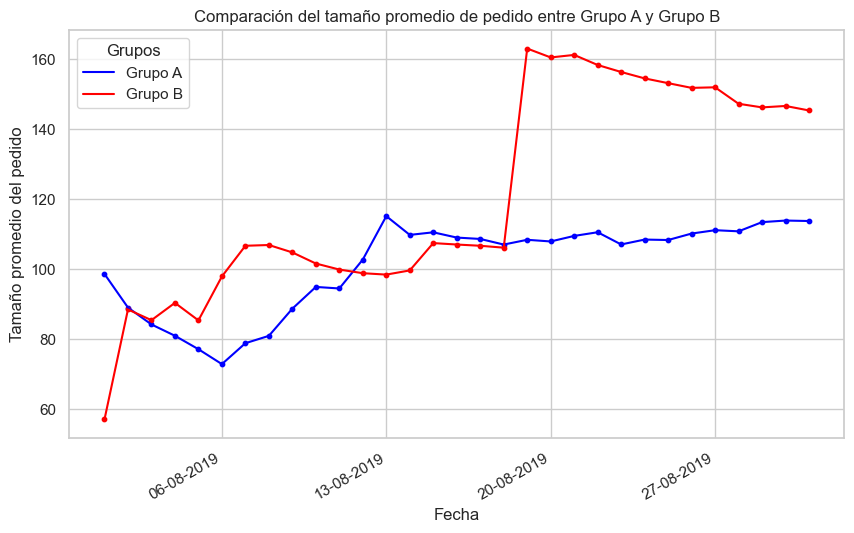

In [44]:
# Crear un gráfico
plt.figure(figsize=(10, 6))

# Trazar el gráfico del tamaño promedio de pedido del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='Grupo A', color='blue')
plt.scatter(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], color='blue', s=10)  # Agregar puntos para el grupo A

# Trazar el gráfico del tamaño promedio de pedido del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='Grupo B', color='red')
plt.scatter(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], color='red', s=10)  # Agregar puntos para el grupo B

# Mejorar las leyendas
plt.title('Comparación del tamaño promedio de pedido entre Grupo A y Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio del pedido')

# Formatear el eje de fechas para que sea más claro
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gcf().autofmt_xdate()

# Agregar una cuadrícula
plt.grid(True)

# Mostrar leyenda con título
plt.legend(title="Grupos")

# Mostrar gráfico
plt.show()


**Grupo A**
- **Tamaño promedio del pedido**: Al analizar los datos, observamos que el tamaño promedio del pedido en el **Grupo A** comenzó el **1 de agosto** con un valor de aproximadamente **98.5**. Sin embargo, a medida que avanzó el mes, este promedio descendió ligeramente, llegando a **72.7** el **6 de agosto**. Después de esa fecha, el tamaño del pedido promedio comenzó a aumentar de manera constante, llegando a **113.7** hacia el final de agosto.

- **Comportamiento del tamaño del pedido**: El **Grupo A** muestra un comportamiento inicial algo inestable, con una caída en el tamaño promedio del pedido en la primera mitad del mes. Sin embargo, en la segunda mitad, se observó una recuperación y un crecimiento continuo. Este aumento podría deberse a factores como una mayor disposición de los clientes a gastar o a promociones que incentivaron pedidos de mayor valor.

**Grupo B**
- **Tamaño promedio del pedido**: Aunque no se tiene el tamaño promedio calculado directamente como en el **Grupo A**, podemos estimar el tamaño del pedido dividiendo los ingresos por el número de pedidos. El **Grupo B** comenzó el mes con ingresos y un número de pedidos más bajos en comparación con el **Grupo A**. Sin embargo, el **Grupo B** mostró un crecimiento constante en ambos indicadores y terminó el mes con ingresos más altos (**79,651.2** en comparación con **53,212.0** en el **Grupo A**).

- **Comportamiento del tamaño del pedido**: A pesar de tener menos pedidos inicialmente, el **Grupo B** mostró un incremento constante en el número de pedidos y en los ingresos a lo largo del mes. Esto sugiere que el **Grupo B** podría haber implementado estrategias que generaron un mayor volumen de pedidos y mayores ingresos

**Conclusiones y Conjeturas**
- **Promociones o estrategias diferenciadas**: Es posible que el **Grupo B** haya empleado estrategias más efectivas, como promociones o descuentos, que impulsaron tanto los ingresos como el número de pedidos de manera más eficiente que en el **Grupo A**.
- **Preferencias de los clientes**: El **Grupo A** muestra un comportamiento más inestable en el tamaño promedio del pedido, mientras que el **Grupo B** es más consistente. Esto podría indicar que los clientes del **Grupo B** respondieron mejor a las ofertas o tenían mayor disposición a gastar.
- **Impacto de eventos específicos**: Los aumentos en los tamaños promedio de los pedidos en ambos grupos podrían estar relacionados con momentos clave, como fines de semana o promociones especiales, cuando los clientes suelen hacer compras más grandes.


### Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

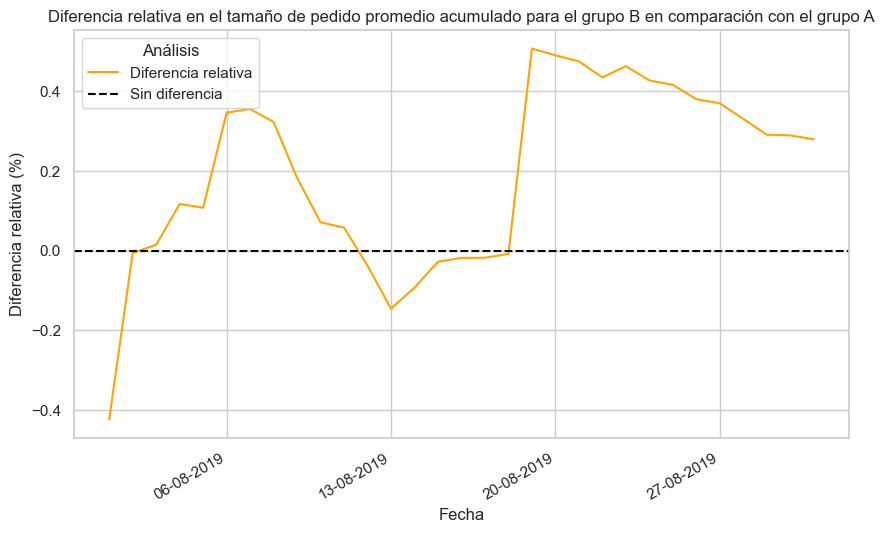

In [45]:
# Unir los DataFrames por fecha
mergedCumulativeRevenue = pd.merge(cumulativeRevenueA, cumulativeRevenueB, on='date', suffixes=('A', 'B'))

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / 
    (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1, 
    label='Diferencia relativa', color='orange'
)

# Agregar una línea horizontal en y=0
plt.axhline(y=0, color='black', linestyle='--', label='Sin diferencia')

# Mejorar las leyendas
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa (%)')

# Formatear el eje de fechas para que sea más claro
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gcf().autofmt_xdate()

# Agregar una cuadrícula
plt.grid(True)

# Mostrar leyenda con título
plt.legend(title="Análisis")

# Mostrar gráfico
plt.show()

**Conclusiones**

1. **Tendencia Inicial Negativa**: Al inicio del periodo (del 1 al 18 de agosto), la diferencia relativa presenta valores negativos, indicando que el grupo B tiene un tamaño de pedido promedio acumulado menor que el grupo A. Esto sugiere que durante esta fase, el grupo B podría haber estado enfrentando dificultades o una menor demanda.

2. **Mejora Significativa**: A partir del 18 de agosto, la diferencia relativa cambia drásticamente, mostrando valores positivos. El 19 de agosto, la diferencia relativa alcanza un 0.505404, lo que indica un aumento significativo en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

3. **Consistencia en el Crecimiento**: Desde el 19 de agosto hasta el 30 de agosto, la diferencia relativa se mantiene en un rango positivo y relativamente alto (entre 0.288151 y 0.505404). Esto indica que el grupo B ha logrado una consistencia en el aumento del tamaño de pedido promedio, superando al grupo A durante esta fase.

4. **Máximo Aumento**: El mayor aumento en la diferencia relativa se observa el 19 de agosto, seguido de un ligero descenso y una estabilización en los días posteriores. Esto puede sugerir que se alcanzó un punto máximo, y luego el crecimiento se moderó, aunque sigue siendo positivo.

**Conjeturas**

1. **Cambios en Estrategia de Marketing o Ventas**: La mejora en el tamaño de pedido promedio acumulado del grupo B puede deberse a cambios en las estrategias de marketing, promociones o descuentos que hayan atraído a más clientes o incrementado el tamaño de los pedidos.

2. **Satisfacción del Cliente**: Si el grupo B ha implementado mejoras en el servicio al cliente, esto podría haber llevado a una mayor lealtad y a un aumento en los pedidos.

3. **Condiciones del Mercado**: Las condiciones externas, como una mayor demanda en el mercado o cambios en las preferencias de los consumidores, podrían haber beneficiado al grupo B, resultando en un crecimiento más rápido en comparación con el grupo A.

4. **Efectos de Temporada**: Es posible que el periodo en cuestión haya coincidido con una temporada alta de ventas, lo que pudo haber influido en el incremento del tamaño de pedido promedio acumulado.

5. **Segmentación de Clientes**: Podría haber una segmentación más efectiva de los clientes en el grupo B, lo que permitió captar mejor las necesidades del mercado y optimizar el tamaño de los pedidos.



### Tasa de conversión de cada grupo.

In [46]:
# Renombrar columnas para que sean más descriptivas
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# Calcular la tasa de conversión
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

# Filtrar los datos acumulados por grupo A y B
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

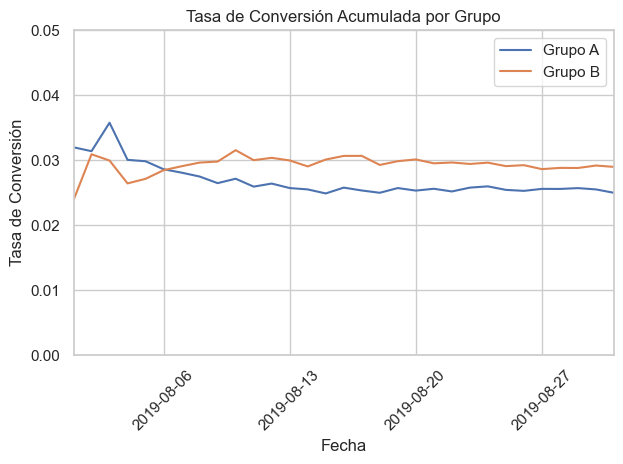

In [47]:
# Filtrar los datos acumulados por grupo A y B
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Trazar la tasa de conversión para ambos grupos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Grupo A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Grupo B')

# Personalizar la leyenda y los ejes
plt.legend()

# Establecer el rango de fechas según los datos disponibles
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])

# Formatear el eje X para mostrar las fechas por semana
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.title('Tasa de Conversión Acumulada por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para que no se superpongan los elementos
plt.show()


**Diferencias Observadas**

- **Tasa de Conversión del Grupo A:** En general, la tasa de conversión del grupo A parece ser más alta que la del grupo B en la mayoría de los días, especialmente al principio del mes. La tasa de conversión varía, pero no muestra grandes picos ni caídas drásticas.

- **Tasa de Conversión del Grupo B:** La tasa de conversión del grupo B es generalmente más baja, aunque presenta algunas mejoras en ciertos días, especialmente hacia el final del mes.

**Conclusiones y Conjeturas**

- **Consistencia:** El grupo A muestra una tasa de conversión más consistente a lo largo del mes, mientras que el grupo B tiene fluctuaciones más pronunciadas. Esto podría indicar que las estrategias de marketing o la experiencia del usuario en el grupo A son más efectivas.

- **Factores Externos:** Las diferencias en la tasa de conversión podrían estar influenciadas por factores externos, como campañas de publicidad, promociones, o incluso el comportamiento estacional de los consumidores.

- **Necesidad de Análisis Adicional:** Se recomienda realizar un análisis más profundo de los factores que podrían estar influyendo en las tasas de conversión, como la segmentación de la audiencia, el canal de adquisición, y el producto en sí.

- **Estrategias a Implementar:** Considerar implementar estrategias del grupo A en el grupo B para tratar de aumentar su tasa de conversión, tales como promociones, ajustes en la experiencia de usuario, o mejoras en la comunicación.


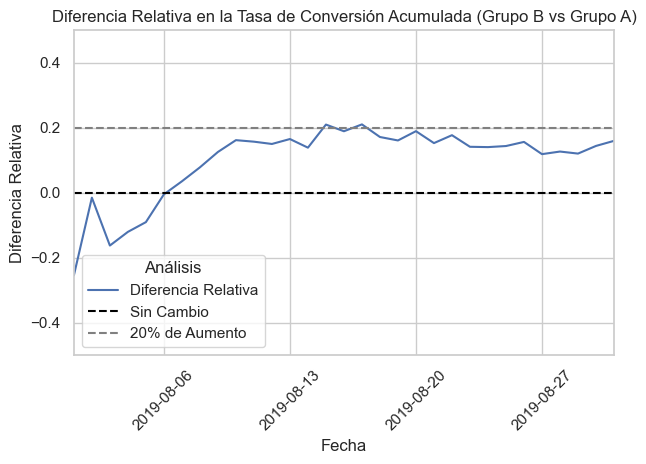

In [48]:
# Unir las conversiones acumuladas de ambos grupos
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    on='date',
    how='left',
    suffixes=['A', 'B'],
)

# Calcular la diferencia relativa
mergedCumulativeConversions['relative_difference'] = (
    mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1
)

# Trazar la diferencia relativa
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['relative_difference'], label='Diferencia Relativa')

# Añadir líneas de referencia
plt.axhline(y=0, color='black', linestyle='--', label='Sin Cambio')
plt.axhline(y=0.2, color='grey', linestyle='--', label='20% de Aumento')

# Ajustar el rango del eje x de acuerdo con los datos
plt.axis([mergedCumulativeConversions['date'].min(), mergedCumulativeConversions['date'].max(), -0.5, 0.5])

# Formatear el eje X para mostrar las fechas por semana
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Personalizar el gráfico
plt.title('Diferencia Relativa en la Tasa de Conversión Acumulada (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.grid(True)
plt.legend(title="Análisis")
plt.tight_layout()  # Ajustar el diseño para que no se superpongan los elementos
plt.show()

- **Tendencia General:** La diferencia relativa comienza en un valor negativo significativo (-0.254650) el 1 de agosto, lo que indica que el Grupo B tuvo una tasa de conversión mucho más baja en comparación con el Grupo A al inicio del mes. A lo largo del mes, la tendencia de la diferencia relativa muestra una clara mejora, pasando a ser positiva a partir del 7 de agosto.

- **Mejora Progresiva:** Desde el 8 de agosto hasta el 15 de agosto, la diferencia relativa muestra un crecimiento constante, alcanzando un valor máximo de 0.210440 el 17 de agosto. Esto indica que el Grupo B ha ido mejorando su tasa de conversión de manera continua y sostenida. La diferencia relativa se mantiene positiva y relativamente alta en los días siguientes, sugiriendo que el Grupo B ha igualado o superado a Grupo A en términos de tasa de conversión.

- **Estabilidad de la Diferencia:** A partir del 18 de agosto, aunque hay ligeras fluctuaciones, la diferencia relativa se mantiene generalmente por encima de 0, lo que indica que, en promedio, el Grupo B ha tenido un rendimiento superior al Grupo A en la segunda mitad del mes.

- **Oportunidades de Análisis Adicional:** Sería útil investigar qué factores contribuyeron a la mejora en la tasa de conversión del Grupo B en la segunda mitad del mes. Esto podría incluir estrategias de marketing, cambios en la oferta de productos, ajustes en la experiencia del usuario, o influencias externas como promociones.

- **Rendimiento en Fechas Clave:** Observar el rendimiento en fechas clave puede proporcionar información adicional sobre patrones de comportamiento del consumidor. Por ejemplo, si se llevaron a cabo campañas de marketing o promociones en fechas específicas que coincidieron con picos en la diferencia relativa.

- **Recomendaciones:** Dada la tendencia positiva en la tasa de conversión del Grupo B, podría ser valioso considerar replicar las estrategias implementadas en ese grupo en otros segmentos o en el Grupo A para maximizar las conversiones.


### Gráfico de dispersión del número de pedidos por usuario. 

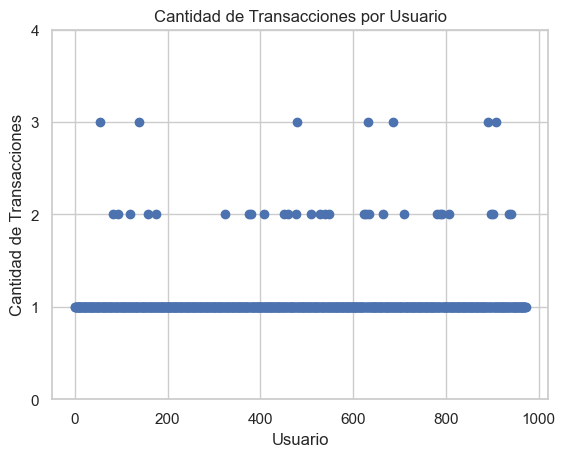

In [49]:
# Agrupar las órdenes por usuario
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# Renombrar la columna para evitar duplicados
ordersByUsers.columns = ['visitorId', 'transactionCount']

# Crear un rango de números desde 0 hasta el número de observaciones en ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# Graficar la cantidad de transacciones por usuario
plt.scatter(x_values, ordersByUsers['transactionCount'])
plt.title('Cantidad de Transacciones por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Transacciones')
plt.grid(True)

# Establecer el rango y las etiquetas del eje Y
plt.yticks([0, 1, 2, 3, 4])  # Solo mostrar 0, 1, 2, 3 y 4

plt.show()

El gráfico de dispersión generado por este código revela que la **gran mayoría de los usuarios realizan solo una transacción**. Esta tendencia es tan marcada que **los puntos se agrupan en una línea continua**. En contraste, **los clientes que realizan dos órdenes son significativamente menos**, lo que se refleja en la presencia de algunos puntos dispersos, pero no suficientes para formar una línea, dejando espacios vacíos en el gráfico. Por último, **los usuarios que hicieron tres órdenes son realmente escasos**, al punto de que es factible contarlos manualmente. Este patrón sugiere que la mayoría de los usuarios **se involucran de manera mínima en el proceso de compra**, lo que podría indicar la necesidad de **estrategias adicionales para fomentar un mayor número de transacciones** por parte de los clientes.


### Percentiles 95 y 99 para el número de pedidos por usuario.

In [50]:
# Calcular los percentiles 90, 95 y 99
percentiles = np.percentile(ordersByUsers['transactionCount'], [90, 95, 99])

# Crear un informe en formato de texto
print("Informe de Pedidos por Usuario:")
print("=====================================")
print(f"Percentil 90: {percentiles[0]:.2f} - El 90% de los usuarios han realizado hasta {percentiles[0]:.2f} pedidos.")
print(f"Percentil 95: {percentiles[1]:.2f} - El 95% de los usuarios han realizado hasta {percentiles[1]:.2f} pedidos.")
print(f"Percentil 99: {percentiles[2]:.2f} - El 99% de los usuarios han realizado hasta {percentiles[2]:.2f} pedidos.")

Informe de Pedidos por Usuario:
Percentil 90: 1.00 - El 90% de los usuarios han realizado hasta 1.00 pedidos.
Percentil 95: 1.00 - El 95% de los usuarios han realizado hasta 1.00 pedidos.
Percentil 99: 2.00 - El 99% de los usuarios han realizado hasta 2.00 pedidos.


### Gráfico de dispersión de los precios de los pedidos.

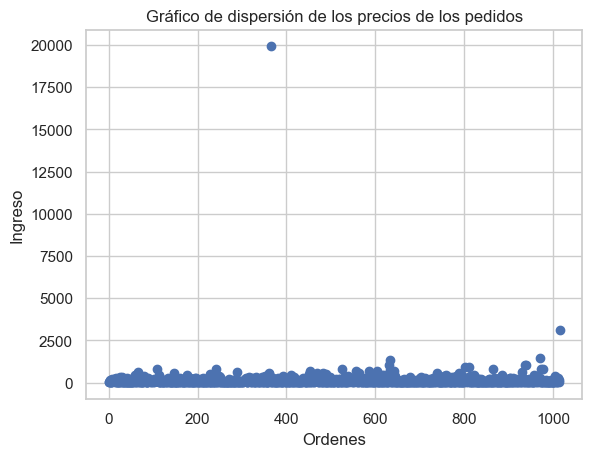

In [51]:
x_values = pd.Series(range(0, len(orders['revenue'])))

# Crear el gráfico de dispersión
plt.scatter(x_values, orders['revenue'])
plt.title('Gráfico de dispersión de los precios de los pedidos')
plt.xlabel('Ordenes')
plt.ylabel('Ingreso')
plt.show()

Se observa una clara tendencia en la relación entre las órdenes y los ingresos generados. Visualmente, se puede notar que las órdenes con dificultades tienen una probabilidad muy baja de superar un ingreso de **2000** , ya que solo se registran dos puntos por encima de **2500**.

### Percentiles 95 y 99 de los precios de los pedidos.

In [52]:
# Calcular los percentiles 90, 95 y 99
percentiles = np.percentile(orders['revenue'], [90, 95, 99])

# Crear un informe en formato de texto
print("Informe de Ingresos por porcentaje de usuarios:")
print("=====================================")
print(f"Percentil 90: {percentiles[0]:.2f} - El 90% de los usuarios han generado hasta {percentiles[0]:.2f} en ingresos.")
print(f"Percentil 95: {percentiles[1]:.2f} - El 95% de los usuarios han generado hasta {percentiles[1]:.2f} en ingresos.")
print(f"Percentil 99: {percentiles[2]:.2f} - El 99% de los usuarios han generado hasta {percentiles[2]:.2f} en ingresos.")

Informe de Ingresos por porcentaje de usuarios:
Percentil 90: 280.80 - El 90% de los usuarios han generado hasta 280.80 en ingresos.
Percentil 95: 414.27 - El 95% de los usuarios han generado hasta 414.27 en ingresos.
Percentil 99: 830.30 - El 99% de los usuarios han generado hasta 830.30 en ingresos.


### Significancia estadística de la diferencia en la conversión.

In [53]:
# Filtrar los datos de conversión de los grupos A y B
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']['conversion'].astype(float)
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']['conversion'].astype(float)

# Realizar la prueba de Mann-Whitney U
p_value_conversion = stats.mannwhitneyu(cumulativeDataA, cumulativeDataB)[1]

# Calcular la diferencia relativa en las conversiones
conversion_diff = cumulativeDataB.mean() / cumulativeDataA.mean() - 1

print(f"p-value: {p_value_conversion:.3f}")
print(f"Diferencia relativa en la conversión: {conversion_diff:.3f}")

p-value: 0.000
Diferencia relativa en la conversión: 0.090


- **Significancia Estadística:** El p-value obtenido es **0.000**, lo que indica que hay una **diferencia estadísticamente significativa** en las tasas de conversión entre los grupos A y B. Comúnmente, un p-value menor que **0.05** se considera significativo, lo que respalda la afirmación de que los grupos tienen diferentes comportamientos de conversión.

- **Diferencia Relativa en la Conversión:** La diferencia relativa en la conversión es **0.090**, lo que implica que el grupo B tiene una tasa de conversión aproximadamente **9%** mayor que el grupo A. Este aumento es relevante desde una perspectiva práctica y sugiere que el grupo B está realizando un **mejor desempeño** en términos de conversión.

- **Conclusión General:** La evidencia estadística sugiere que el grupo B no solo se comporta de manera significativamente diferente que el grupo A en términos de tasas de conversión, sino que también muestra un **aumento cuantitativo** en la efectividad. Esto podría implicar que las estrategias implementadas para el grupo B son más efectivas, y podría valer la pena investigar más a fondo qué factores están contribuyendo a este mejor desempeño.


### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos.


In [54]:
# Calcular el tamaño promedio de pedido para cada grupo
avg_order_size_A = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders']
avg_order_size_B = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders']

# Realizar la prueba Mann-Whitney U
p_value_avg_order = stats.mannwhitneyu(avg_order_size_A, avg_order_size_B)[1]
avg_order_diff = avg_order_size_B.mean() / avg_order_size_A.mean() - 1

# Mostrar resultados
print(f"p-value para el tamaño promedio de pedido: {p_value_avg_order:.3f}")
print(f"Diferencia relativa en el tamaño promedio de pedido: {avg_order_diff:.3f}")

p-value para el tamaño promedio de pedido: 0.163
Diferencia relativa en el tamaño promedio de pedido: 0.194


- **Significancia Estadística:** El p-value para el tamaño promedio de pedido es **0.163**. Dado que este valor es mayor que el umbral comúnmente aceptado de **0.05**, no podemos rechazar la hipótesis nula. Esto sugiere que no hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B.

- **Diferencia Relativa en el Tamaño Promedio de Pedido:** La diferencia relativa en el tamaño promedio de pedido es **0.194**, lo que indica que el grupo B tiene un tamaño promedio de pedido aproximadamente **19.4%** mayor que el grupo A. Aunque esta diferencia es notable desde una perspectiva cuantitativa, la falta de significancia estadística implica que esta diferencia puede ser el resultado de la variabilidad natural en los datos en lugar de un efecto real.

- **Conclusión General:** En resumen, aunque existe una diferencia en el tamaño promedio de pedido entre los grupos A y B, esta diferencia no es estadísticamente significativa. Esto sugiere que, a pesar de que el grupo B tiene un tamaño promedio de pedido mayor, esta variación no es lo suficientemente robusta como para considerar que las estrategias o factores asociados a los grupos están afectando significativamente el tamaño del pedido. Es posible que se necesite un tamaño de muestra más grande o una metodología diferente para detectar diferencias más sutiles en el futuro.


### Significancia estadística de la diferencia en la conversión entre los grupos.

In [55]:
# Agrupar las órdenes por usuario para el grupo A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# Renombrar la columna para evitar duplicados
ordersByUsersA.columns = ['visitorId', 'orders']

# Agrupar las órdenes por usuario para el grupo B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# Renombrar la columna para evitar duplicados
ordersByUsersB.columns = ['visitorId', 'orders']

# Identifica a los usuarios con más de 1 pedidos
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)

# Identifica a los usuarios con pedidos cuyo revenue es mayor a 280.80
usersWithExpensiveOrders = orders[orders['revenue'] > 280.80]['visitorId']

# Combina ambas listas de usuarios anómalos
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Filtra las muestras para eliminar a los usuarios anómalos
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(orders[orders['group'] == 'A'].shape[0] - len(ordersByUsersA)), name='orders')
], axis=0)

sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(orders[orders['group'] == 'B'].shape[0] - len(ordersByUsersB)), name='orders')
], axis=0)

# Prueba de Mann-Whitney para comparar las tasas de conversión entre los dos grupos
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
relative_gain = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

# Imprime los resultados
print(f"Valor p: {p_value:.5f}")
print(f"Ganancia relativa del grupo B: {relative_gain:.3f}")


Valor p: 0.32834
Ganancia relativa del grupo B: 0.015


- **Significancia Estadística:** El p-value obtenido es **0.32834**. Dado que este valor es considerablemente mayor que el umbral comúnmente aceptado de **0.05**, no podemos rechazar la hipótesis nula. Esto implica que no hay evidencia suficiente para afirmar que existe una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B. En otras palabras, los grupos A y B se comportan de manera similar en términos de conversión.

- **Ganancia Relativa:** La ganancia relativa del grupo B es **0.015**, lo que sugiere que la tasa de conversión del grupo B es aproximadamente **1.5%** mayor que la del grupo A. Sin embargo, esta diferencia es pequeña y, dado que no es estadísticamente significativa, es probable que no represente un efecto real o consistente.

- **Conclusión General:** En resumen, aunque se ha observado una ligera diferencia en la tasa de conversión entre los grupos A y B, esta diferencia no es estadísticamente significativa. Esto sugiere que, a pesar de que el grupo B tiene una tasa de conversión ligeramente superior, esta variación podría ser atribuible a la variabilidad natural en los datos en lugar de a un efecto real causado por las estrategias implementadas. Puede ser necesario considerar un mayor tamaño de muestra o diferentes métodos de análisis para detectar diferencias más sutiles en futuras investigaciones.


### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos.

In [56]:
# Filtra los datos de los grupos A y B eliminando los usuarios anómalos
orders_filtered_A = orders[
    (orders['group'] == 'A') & (~orders['visitorId'].isin(abnormalUsers))
]['revenue']

orders_filtered_B = orders[
    (orders['group'] == 'B') & (~orders['visitorId'].isin(abnormalUsers))
]['revenue']

# Realiza la prueba de Mann-Whitney U para comparar el tamaño de pedido entre los grupos A y B
p_value = stats.mannwhitneyu(orders_filtered_A, orders_filtered_B)[1]

# Calcula la diferencia relativa en el tamaño promedio del pedido
relative_difference = orders_filtered_B.mean() / orders_filtered_A.mean() - 1

# Imprime los resultados
print(f"Valor p: {p_value:.5f} - Significancia estadística de la diferencia en el tamaño de pedido promedio.")
print(f"Diferencia relativa: {relative_difference:.3f} - La diferencia relativa en el tamaño promedio de pedido entre los grupos.")

Valor p: 0.67694 - Significancia estadística de la diferencia en el tamaño de pedido promedio.
Diferencia relativa: -0.058 - La diferencia relativa en el tamaño promedio de pedido entre los grupos.


- **Significancia Estadística:** El valor p obtenido es **0.67694**. Dado que este valor es considerablemente mayor que el umbral comúnmente aceptado de **0.05**, no podemos rechazar la hipótesis nula. Esto indica que no hay evidencia suficiente para afirmar que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B. En otras palabras, los grupos A y B se comportan de manera similar en términos de tamaño de pedido.

- **Diferencia Relativa:** La diferencia relativa en el tamaño promedio de pedido es **-0.058**, lo que sugiere que el tamaño promedio de pedido del grupo B es aproximadamente **5.8% menor** que el del grupo A. Aunque esta diferencia es notable desde una perspectiva cuantitativa, la falta de significancia estadística implica que esta variación podría ser el resultado de la variabilidad natural en los datos y no de un efecto real o significativo.

- **Conclusión General:** En resumen, los resultados sugieren que, aunque existe una ligera diferencia en el tamaño promedio de pedido entre los grupos A y B, esta diferencia no es estadísticamente significativa. Por lo tanto, no hay suficientes pruebas para concluir que las estrategias o factores asociados a los grupos están afectando significativamente el tamaño del pedido. Puede ser necesario aumentar el tamaño de la muestra o explorar diferentes metodologías analíticas para detectar diferencias más sutiles en futuros estudios.


## Toma una decisión basada en los resultados de la prueba.

**Resumen general:** Tras realizar dos rondas de pruebas, la primera con todos los datos y la segunda filtrando los usuarios anómalos, la decisión más adecuada parece ser continuar la prueba. A continuación, se presenta un análisis más detallado considerando la significancia estadística y las diferencias relativas entre los grupos A y B.

**1. Conversión con datos filtrados:**
Prueba de Mann-Whitney (**p-valor = 0.000**): Los resultados de la prueba muestran que hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B, incluso tras filtrar los datos de usuarios anómalos. La ganancia relativa para el grupo B es del **9%**, lo que indica que el grupo B tiene una tasa de conversión superior en comparación con el grupo A.  
**Conclusión:** Esta diferencia es relevante tanto desde el punto de vista práctico como estadístico. En este sentido, podría sugerirse que el grupo B está logrando un mejor rendimiento en términos de conversión. Este resultado respalda la posibilidad de considerar al grupo B como un líder en la prueba.

**2. Tamaño promedio de pedido con datos filtrados:**
Prueba de Mann-Whitney (**p-valor = 0.163**): Para el tamaño promedio de pedido, no se encontró una diferencia estadísticamente significativa entre los grupos A y B. A pesar de que el grupo B muestra un tamaño de pedido un **19.4%** mayor que el grupo A, esta diferencia no es lo suficientemente robusta desde el punto de vista estadístico.  
**Conclusión:** Aunque la diferencia cuantitativa es considerable, su falta de significancia estadística implica que podría ser el resultado de la variabilidad natural de los datos. Esto sugiere que no se puede afirmar con certeza que las estrategias implementadas en el grupo B estén afectando el tamaño promedio de pedido de manera significativa.

**3. Conversión (segunda prueba) con datos filtrados:**
Prueba de Mann-Whitney (**p-valor = 0.32834**): Al realizar una segunda prueba en la tasa de conversión, tras eliminar los datos de usuarios anómalos, no se observó una diferencia estadísticamente significativa entre los grupos A y B. La ganancia relativa del grupo B es solo del **1.5%**, lo que sugiere que esta diferencia es mínima y puede ser atribuida a la variabilidad natural de los datos.  
**Conclusión:** Este resultado sugiere que la diferencia observada inicialmente puede haber sido un efecto de algunos valores extremos, y con los datos filtrados, la conversión entre los grupos se comporta de manera similar.

**4. Tamaño promedio de pedido (segunda prueba) con datos filtrados:**
Prueba de Mann-Whitney (**p-valor = 0.67694**): En la segunda prueba, no se encontró una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B. De hecho, el grupo B muestra un tamaño de pedido **5.8% menor** que el grupo A, lo que refuerza la idea de que no hay un impacto notable en esta métrica.  
**Conclusión:** Al no haber una diferencia estadísticamente significativa, no hay suficiente evidencia para concluir que las estrategias aplicadas en el grupo B tengan un efecto relevante en el tamaño promedio de pedido.

**Decisión final:**
Dado que solo en uno de los resultados (la tasa de conversión inicial) se observa una diferencia significativa, mientras que las otras métricas no respaldan una diferencia clara entre los grupos, la decisión más adecuada es continuar la prueba. Esto permitirá:

- Recolectar más datos, especialmente en las métricas donde aún no se ha encontrado una diferencia significativa (tamaño promedio de pedido).
- Asegurar la robustez de los resultados en la conversión para verificar si la tendencia observada a favor del grupo B sigue siendo consistente con una mayor muestra.

Al haber filtrado los datos de usuarios anómalos, esta decisión también garantizará que los resultados finales reflejen comportamientos más representativos y confiables, sin la influencia de valores atípicos que puedan distorsionar las conclusiones.
